In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('advertising.csv')

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
data.shape

(200, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

C:\Users\ramsu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ramsu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


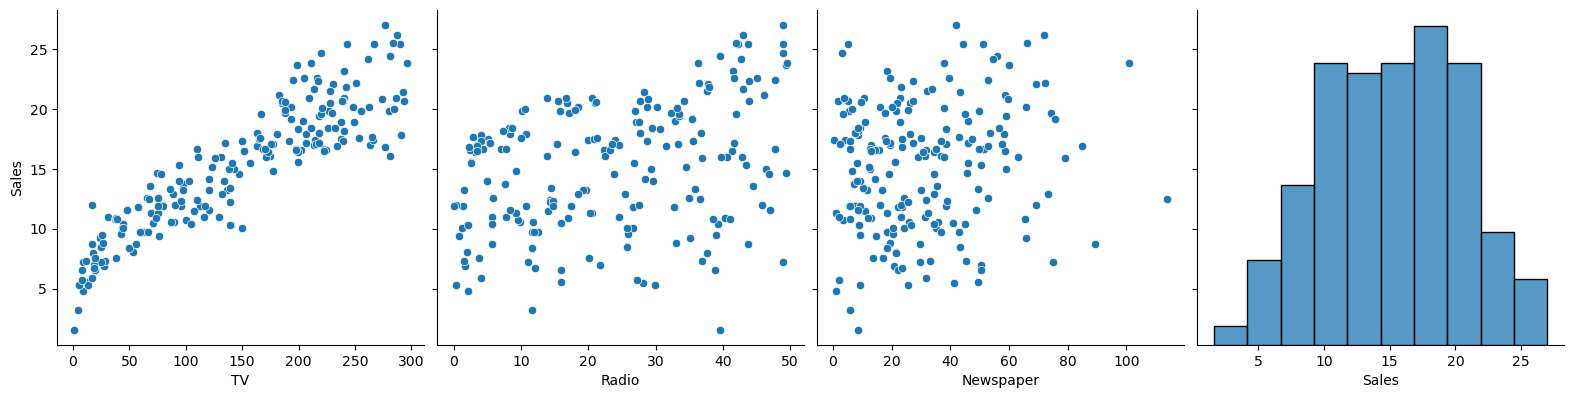

In [9]:
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper', 'Sales'], y_vars='Sales', size=4, kind='scatter')
plt.show()

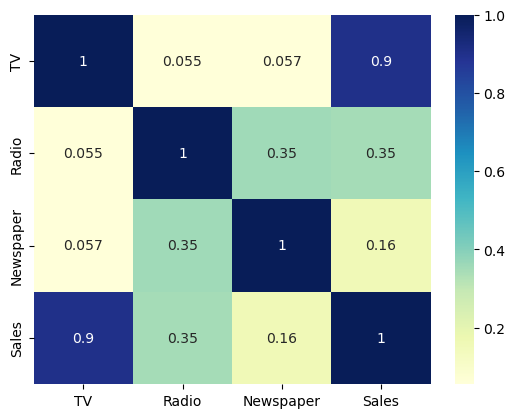

In [11]:
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True)
plt.show()

In [12]:
X = data['TV']
y = data['Sales']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=100)

In [16]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [17]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [18]:
import statsmodels.api as sm

In [19]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

In [20]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [21]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           1.52e-52
Time:                        02:33:05   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

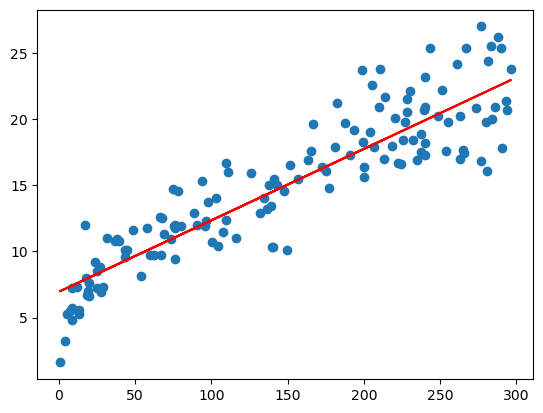

In [22]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054* X_train, 'r')
plt.show()

In [24]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

C:\Users\ramsu\AppData\Local\Temp\ipykernel_16304\985897886.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=15)


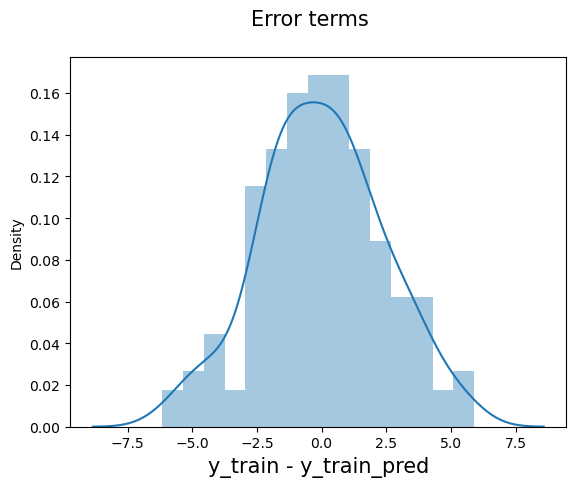

In [27]:
fig = plt.figure()
sns.distplot(res, bins=15)
plt.suptitle("Error terms", fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

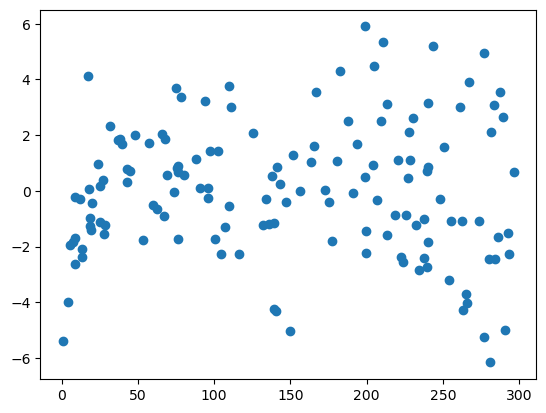

In [28]:
plt.scatter(X_train, res)
plt.show()

In [29]:
X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)

In [30]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [32]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966233

In [33]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7921031601245658

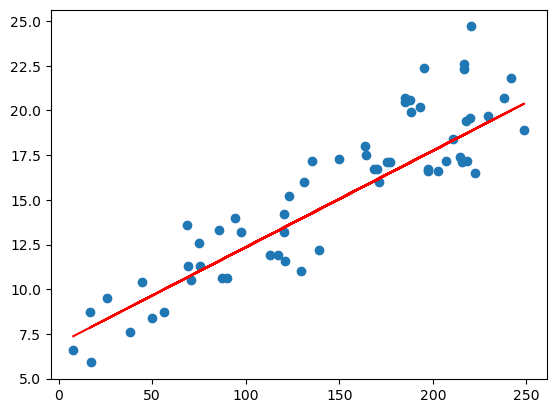

In [35]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

In [36]:
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, test_size=.3, random_state=101)

In [37]:
X_train_lm.shape

(140,)

In [39]:
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

In [41]:
print(X_train_lm.shape)
print(X_test_lm.shape)
print(y_train_lm.shape)
print(y_test_lm.shape)

(140, 1)
(60, 1)
(140,)
(60,)


In [42]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [43]:
print(lm.intercept_)
print(lm.coef_)

6.873404370052185
[0.0561179]
